# Tes `SORA` dengan data SAO 159213

In [1]:
%config InlineBackend.figure_format = 'retina'

from sora import LightCurve, Body, Star, Observer, Occultation
import arviz as az
az.style.use('arviz-darkgrid')

import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import os

from astropy.time import Time
import astropy.units as u

import numpy as np

from skyfield.api import load

# plt.rcParams['figure.figsize'] = (12,5)

pd.set_option('display.float_format',  '{:}'.format)

SORA version: 0.2.1


In [2]:
df = pd.read_csv('sao159213.csv', sep=',')
df.tail()

,FrameNum,timeInfo,signal-obj,appsum-obj,avgbkg-obj,stdbkg-obj,nmaskpx-obj,maxpx-obj,xcentroid-obj,ycentroid-obj
1496,7996.0,[12:30:29.1081969],-3304.0,45664.0,1323.45,375.56,-37,2368,199.0,144.0
1497,7997.0,[12:30:29.1162976],1896.0,50688.0,1318.69,385.25,-37,2304,199.0,144.0
1498,7998.0,[12:30:29.1243983],-1102.0,46560.0,1288.16,365.11,-37,2560,199.0,144.0
1499,7999.0,[12:30:29.1324990],1249.0,50016.0,1318.03,390.02,-37,2688,199.0,144.0
1500,8000.0,[12:30:29.1405997],538.0,47712.0,1274.97,384.02,-37,2432,199.0,144.0


In [3]:
# hilangkan karakter [ dan ] dari data
df['timeInfo'] = df['timeInfo'].map((lambda x: x.lstrip('[').rstrip(']')))

# ubah ke format waktu dan ambil tanggal dan jamnya
df['timeInfo'] = pd.to_datetime(df['timeInfo'])

df.tail()

,FrameNum,timeInfo,signal-obj,appsum-obj,avgbkg-obj,stdbkg-obj,nmaskpx-obj,maxpx-obj,xcentroid-obj,ycentroid-obj
1496,7996.0,2022-09-06 12:30:29.108196,-3304.0,45664.0,1323.45,375.56,-37,2368,199.0,144.0
1497,7997.0,2022-09-06 12:30:29.116297,1896.0,50688.0,1318.69,385.25,-37,2304,199.0,144.0
1498,7998.0,2022-09-06 12:30:29.124398,-1102.0,46560.0,1288.16,365.11,-37,2560,199.0,144.0
1499,7999.0,2022-09-06 12:30:29.132499,1249.0,50016.0,1318.03,390.02,-37,2688,199.0,144.0
1500,8000.0,2022-09-06 12:30:29.140599,538.0,47712.0,1274.97,384.02,-37,2432,199.0,144.0


In [4]:
data = df[['FrameNum','timeInfo','signal-obj']]
data.columns = ['Frame','Time', 'Value']
data.tail()

,Frame,Time,Value
1496,7996.0,2022-09-06 12:30:29.108196,-3304.0
1497,7997.0,2022-09-06 12:30:29.116297,1896.0
1498,7998.0,2022-09-06 12:30:29.124398,-1102.0
1499,7999.0,2022-09-06 12:30:29.132499,1249.0
1500,8000.0,2022-09-06 12:30:29.140599,538.0


In [5]:
data_cp = data.copy()

data_cp['JD'] = Time(data_cp['Time']).jd

data_cp['frac_JD'] = data_cp['JD'] - np.floor(data_cp['JD']).astype(int)
data_cp

,Frame,Time,Value,JD,frac_JD
0,6500.0,2022-09-06 12:30:16.989775,17655.0,2459829.0210299743,0.021029974333941936
1,6501.0,2022-09-06 12:30:16.997876,20202.0,2459829.021030068,0.021030067931860685
2,6502.0,2022-09-06 12:30:17.005965,17583.0,2459829.0210301615,0.021030161529779434
3,6503.0,2022-09-06 12:30:17.014066,15921.0,2459829.0210302556,0.02103025559335947
4,6504.0,2022-09-06 12:30:17.022167,15592.0,2459829.021030349,0.02103034919127822
...,...,...,...,...,...
1496,7996.0,2022-09-06 12:30:29.108196,-3304.0,2459829.021170234,0.021170233841985464
1497,7997.0,2022-09-06 12:30:29.116297,1896.0,2459829.0211703274,0.021170327439904213
1498,7998.0,2022-09-06 12:30:29.124398,-1102.0,2459829.0211704215,0.02117042150348425
1499,7999.0,2022-09-06 12:30:29.132499,1249.0,2459829.021170515,0.021170515101402998


Text(0.5, 0, 'Frames')

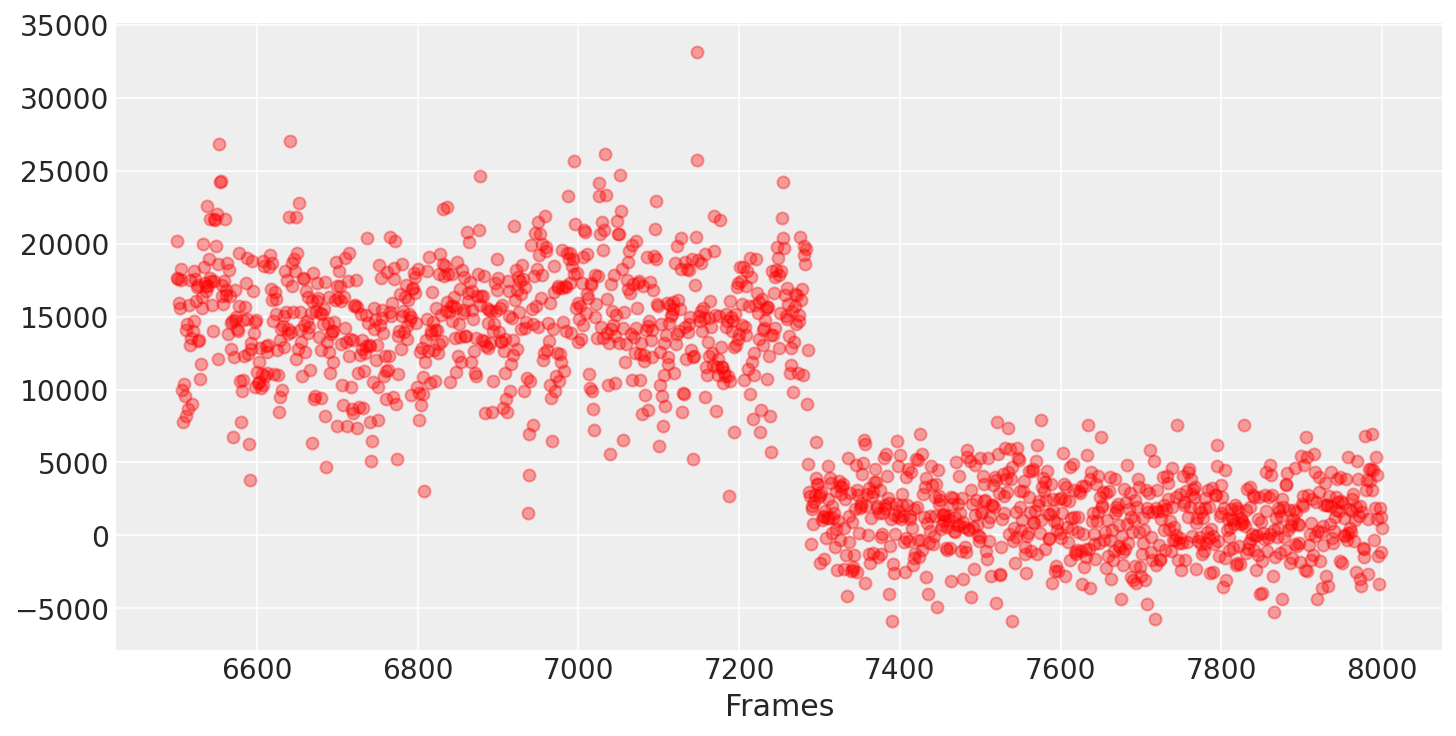

In [6]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(data_cp['Frame'], data_cp['Value'], 'ro', alpha=0.35)
# ax.set_xlim(3300, 3700)
ax.set_xlabel('Frames')

## *Data smoothing*

In [7]:
# from scipy.signal import savgol_filter

# x = data_cp['Frame']
# y = data_cp['Value']
# y_filtered = savgol_filter(y, 10, 3)

In [8]:
# plt.figure(figsize=(10,5))
# plt.scatter(x, y_filtered, c='r', marker='o', alpha=0.3)
# # plt.xlim(3300, 3700)

## Normalisasi

Text(0.5, 0, 'Frames')

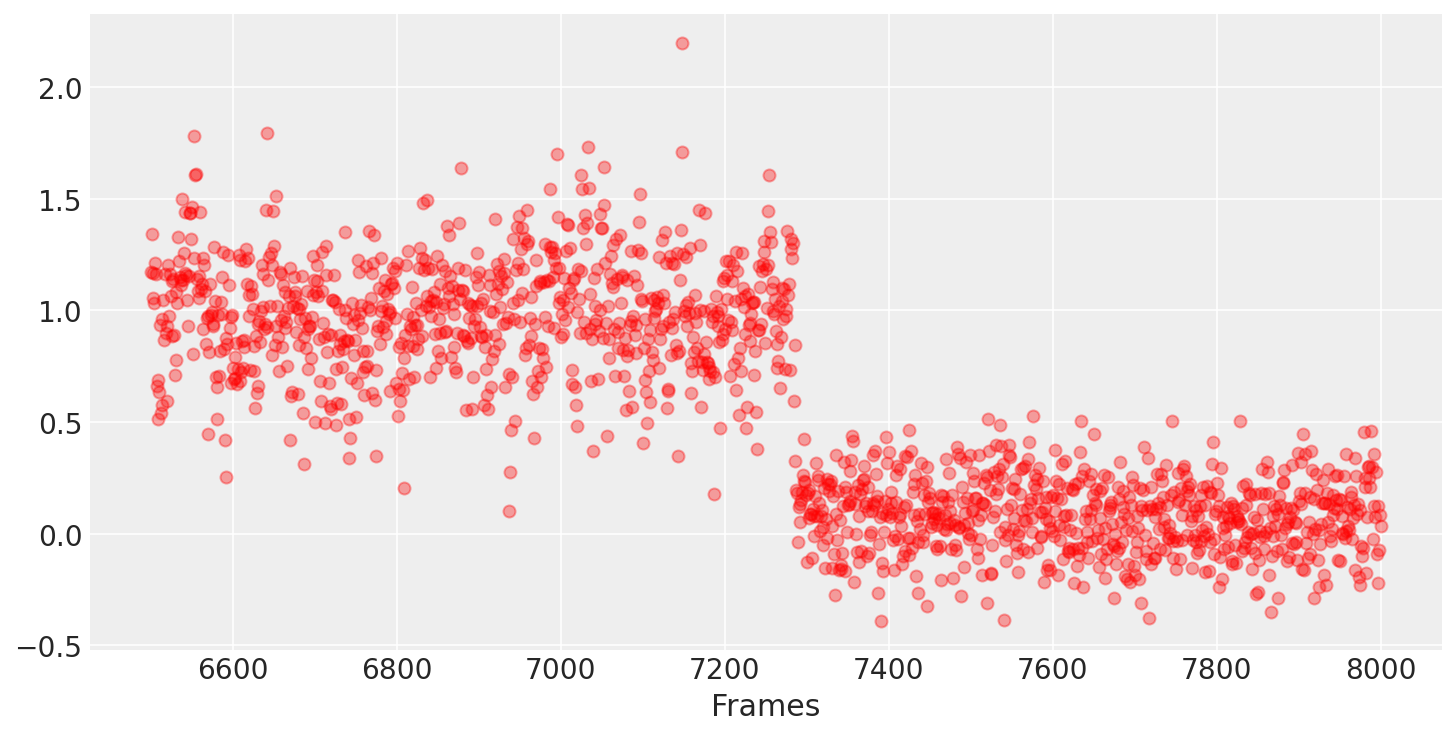

In [9]:
# data_cp['y_scaled'] = y_filtered/(y_filtered.std()*2)

data_cp['y_scaled'] = data_cp['Value']/(data_cp['Value'].std()*2)


fig, ax = plt.subplots(figsize=(10,5))

ax.plot(data_cp['Frame'], data_cp['y_scaled'], 'ro', alpha=0.35)
ax.set_xlabel('Frames')

In [10]:
# tulis ke dalam file csv yang baru
data_cp.to_csv('lc_sao159213.csv', header=False, columns=['JD', 'y_scaled'], index=False, sep='\t')

In [11]:
data_cp

,Frame,Time,Value,JD,frac_JD,y_scaled
0,6500.0,2022-09-06 12:30:16.989775,17655.0,2459829.0210299743,0.021029974333941936,1.1717512873573035
1,6501.0,2022-09-06 12:30:16.997876,20202.0,2459829.021030068,0.021030067931860685,1.340794081404262
2,6502.0,2022-09-06 12:30:17.005965,17583.0,2459829.0210301615,0.021030161529779434,1.1669726924725838
3,6503.0,2022-09-06 12:30:17.014066,15921.0,2459829.0210302556,0.02103025559335947,1.056666793883638
4,6504.0,2022-09-06 12:30:17.022167,15592.0,2459829.021030349,0.02103034919127822,1.0348312700354052
...,...,...,...,...,...,...
1496,7996.0,2022-09-06 12:30:29.108196,-3304.0,2459829.021170234,0.021170233841985464,-0.21928440970991395
1497,7997.0,2022-09-06 12:30:29.116297,1896.0,2459829.0211703274,0.021170327439904213,0.12583633196428476
1498,7998.0,2022-09-06 12:30:29.124398,-1102.0,2459829.0211704215,0.02117042150348425,-0.07313904948557058
1499,7999.0,2022-09-06 12:30:29.132499,1249.0,2459829.021170515,0.021170515101402998,0.08289534737520658


## Kurva cahaya untuk `SORA`

In [12]:
lc = LightCurve(name='SAO 159213', file='lc_sao159213.csv', exptime=0.008)

print(lc)

Light curve name: SAO 159213
Initial time: 2022-09-06 12:30:16.990 UTC
End time:     2022-09-06 12:30:29.141 UTC
Duration:     0.203 minutes
Time offset:  0.000 seconds

Exposure time:    0.0080 seconds
Cycle time:       0.0081 seconds
Num. data points: 1501


There is no occultation associated with this light curve.

Object LightCurve model was not fitted.

Immersion and emersion times were not fitted or instantiated.




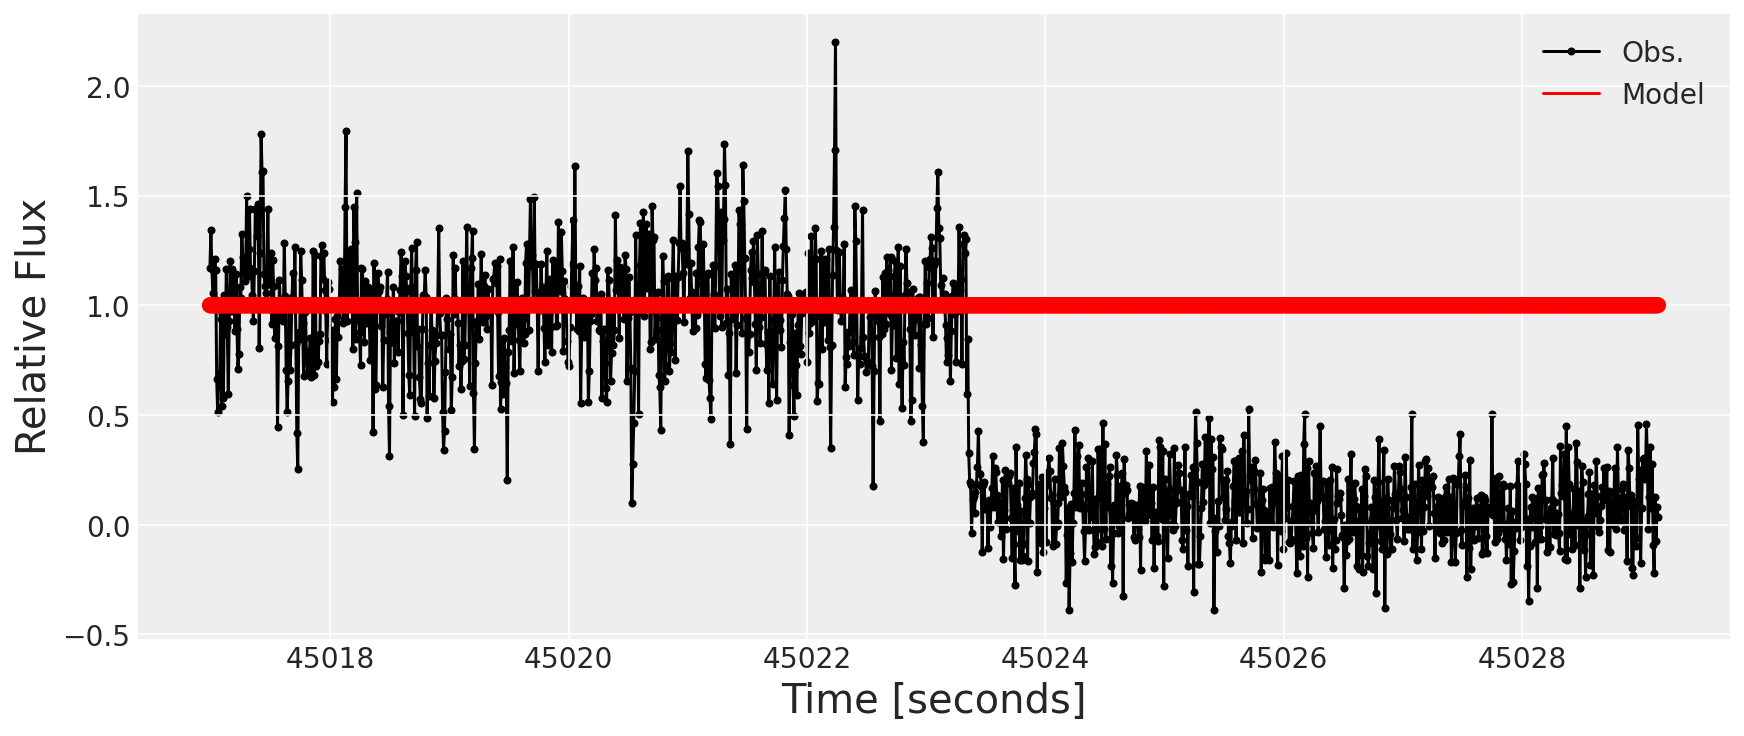

In [13]:
plt.figure(figsize=(12,5))
lc.plot_lc()
# plt.xlim(46628,46633)

{'rank': 1,
 'occultation_duration': 5.778061598539352,
 'central_time': 45026.243576556444,
 'immersion_time': 45023.354545757174,
 'emersion_time': 45029.132607355714,
 'time_err': 0.0040434300899505615,
 'depth': 0.8994543851142756,
 'depth_err': 0.16452111699798835,
 'baseline': 0.9816330548019395,
 'baseline_err': 0.259268583696416,
 'snr': 5.467105995428377,
 'occ_mask': array([False, False, False, ...,  True,  True, False])}

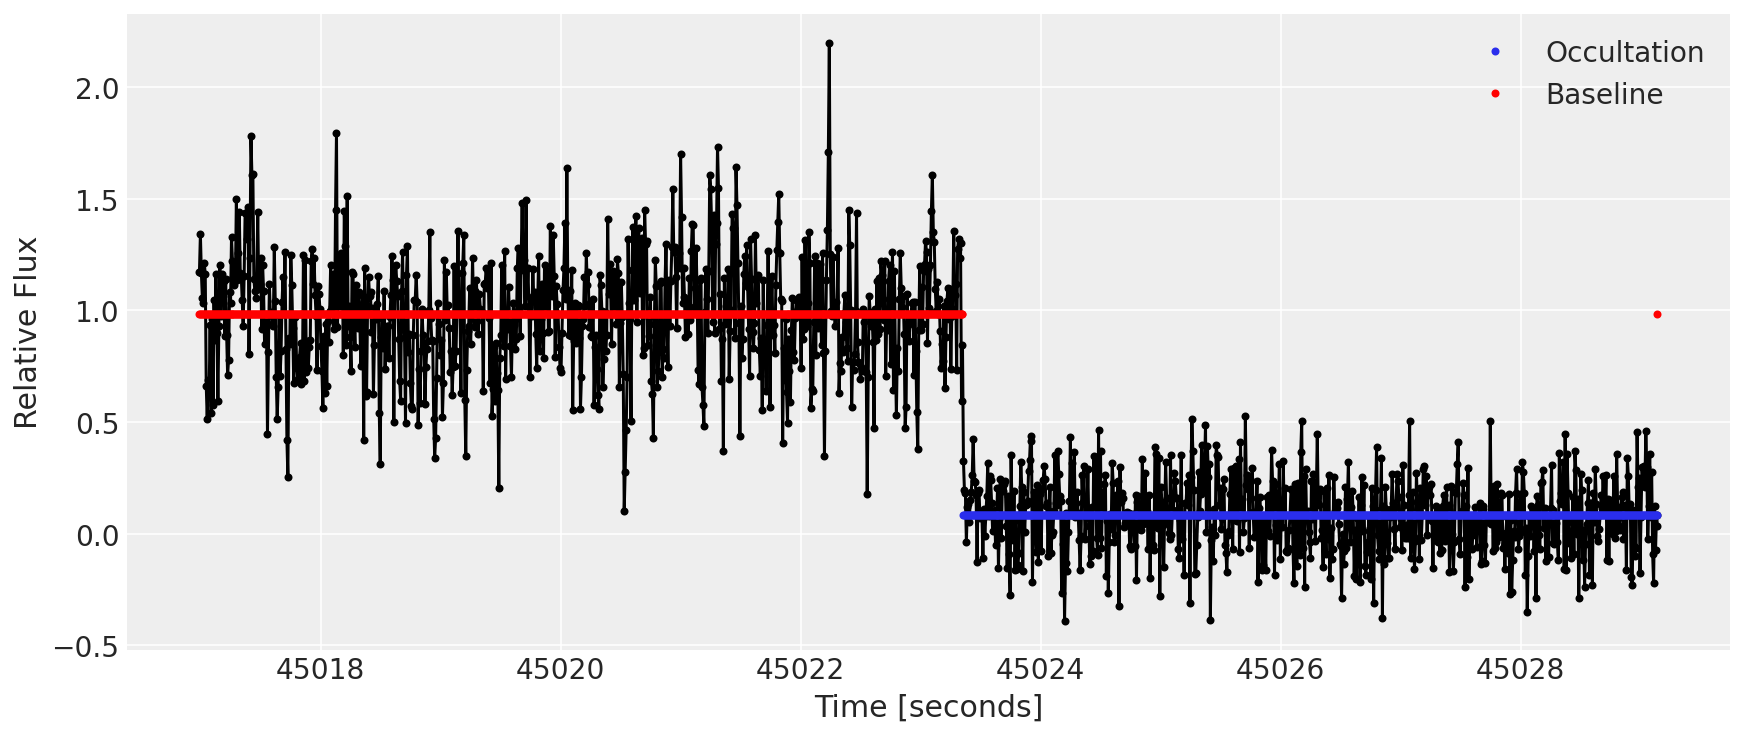

In [14]:
plt.figure(figsize=(12,5))
tes = lc.occ_detect(plot=True)
tes

## Pembuatan model

Model kurva cahaya okultasi oleh `SORA` memerlukan beberapa input:
 - Kecepatan bayangan saat *event*, dalam km/s
 - Jarak obyek, dalam AU
 - $\lambda$ pusat dan $\Delta \lambda$ (atau *bandwidth*), dalam mikron
 - Proyeksi diameter bintang pada jarak obyek, dalam km

### A. Jarak obyek penutup saat pengamatan

Untuk okultasi Bulan, obyek penutup adalah Bulan. Pengamatan dilakukan pada tanggal **2 September 2022 pukul 12:30:23.7 UT**. Ephemeris diambil dari https://ssd.jpl.nasa.gov/ftp/eph/planets/ascii/.

In [15]:
# load timescale dan tampilkan waktu saat ini
ts = load.timescale()

# custom waktu untuk yyyy, mm, dd, hh, mm, ss
t = ts.utc(2022, 9, 2, 12, 30, 23.7)

In [16]:
# Load the JPL ephemeris DE430 (covers 1549-2650) dan cari jarak Bumi-Bulan
planets = load('de430.bsp')
earth, moon = planets['earth'], planets['moon']

In [17]:
# posisi Bulan dari Bumi
astrometric = earth.at(t).observe(moon)
ra, dec, distance = astrometric.radec()

In [18]:
# tampilkan koordinat Bulan dan jarak Bulan dalam AU
print(ra)
print(dec)
print(distance.au)

15h 25m 17.96s
-19deg 29' 10.6"
0.0025168422725332542


In [19]:
d_moon = distance.au
d_moon

0.0025168422725332542

In [20]:
lc.set_dist(dist=d_moon)

lc.dist

0.0025168422725332542

### B. Nilai $\lambda_0$ dan *bandwidth* $\Delta \lambda$

In [21]:
lc.set_filter(central_bandpass=0.55, delta_bandpass=0.2)

print('Observational wavelength centred at {:1.3f} with a bandwidth of {:1.3f} microns'
      .format(lc.central_bandpass,lc.delta_bandpass))

Observational wavelength centred at 0.550 with a bandwidth of 0.200 microns


### C. Proyeksi diameter bintang pada jarak obyek penutup

In [22]:
lc.fresnel_scale

0.010133040597957357

In [24]:
from sora import Star
from sora.star import kervella, van_belle

In [25]:
star = Star(coord='15 23 11.4 -19 47 16')


2 stars were found within 2 arcsec from given coordinate.
The list below is sorted by distance. Please select the correct star
num dist(")  Gmag         RA___ICRS___DEC        
--- ------- ------ ------------------------------
  1   0.493  8.004 15h23m11.4263s -19d47m16.3244s
  2   1.819 10.904 15h23m11.5277s -19d47m15.7545s
  0: Cancel
Choose the corresponding number of the correct star: 1
1 Gaia-EDR3 star found G=8.004031
star coordinate at J2016.0: RA=15h23m11.42630s +/- 0.0208 mas, DEC=-19d47m16.3244s +/- 0.0181 mas



In [26]:
star.mag

{'G': 8.004031,
 'B': 11.38700008392334,
 'V': 10.795999526977539,
 'R': 7.639999866485596,
 'J': 6.046000003814697,
 'H': 5.361000061035156,
 'K': 5.183000087738037}

In [27]:
from sora import Observer

bosscha = Observer(name='Bosscha Observatory', code='299')

pos = star.get_position(time='2022-09-02 12:30:23.7', observer=bosscha)
print(pos.to_string('hmsdms', precision=10))

15h23m11.4192185257s -19d47m16.4165150765s


In [28]:
star.error_at(time='2022-09-02 12:30:23.7')

(<Quantity 0.18676568 mas>, <Quantity 0.15888869 mas>)

In [29]:
diameter = star.apparent_diameter(distance=d_moon)

diameter

Apparent diameter using Kervella et al. (2004)


<Quantity 0.00146399 km>

In [30]:
diameter.value

0.0014639886801160577

In [31]:
lc.set_star_diam(d_star=diameter.value)

### D. Kecepatan bayangan Bulan di Bumi

Bulan bergerak relatif terhadap bintang latar belakang dengan kecepatan 0.55 arcsec/s. Ubah nilai ini ke dalam km/s. kalikan angka ini dengan $\sin \theta$ di mana $\theta$ adalah sudut kontak (*contact angle*, CA). Pada pekerjaan ini, nilai kecepatan bayangan diambil dari perangkat lunak `OCCULT v4`

In [32]:
from astropy.coordinates import Angle
# ang_vel = 0.55*u.arcsec # dalam arcsec/s

# lin_vel = distance.km * np.tan(ang_vel)

kms = u.km/u.s
lin_vel = 0.6986*kms # dari Occult v4

lin_vel

<Quantity 0.6986 km / s>

In [33]:
lc.set_vel(vel=lin_vel.value)

{'rank': 1,
 'occultation_duration': 5.778061598539352,
 'central_time': 45026.243576556444,
 'immersion_time': 45023.354545757174,
 'emersion_time': 45029.132607355714,
 'time_err': 0.0040434300899505615,
 'depth': 0.8994543851142756,
 'depth_err': 0.16452111699798835,
 'baseline': 0.9816330548019395,
 'baseline_err': 0.259268583696416,
 'snr': 5.467105995428377,
 'occ_mask': array([False, False, False, ...,  True,  True, False])}

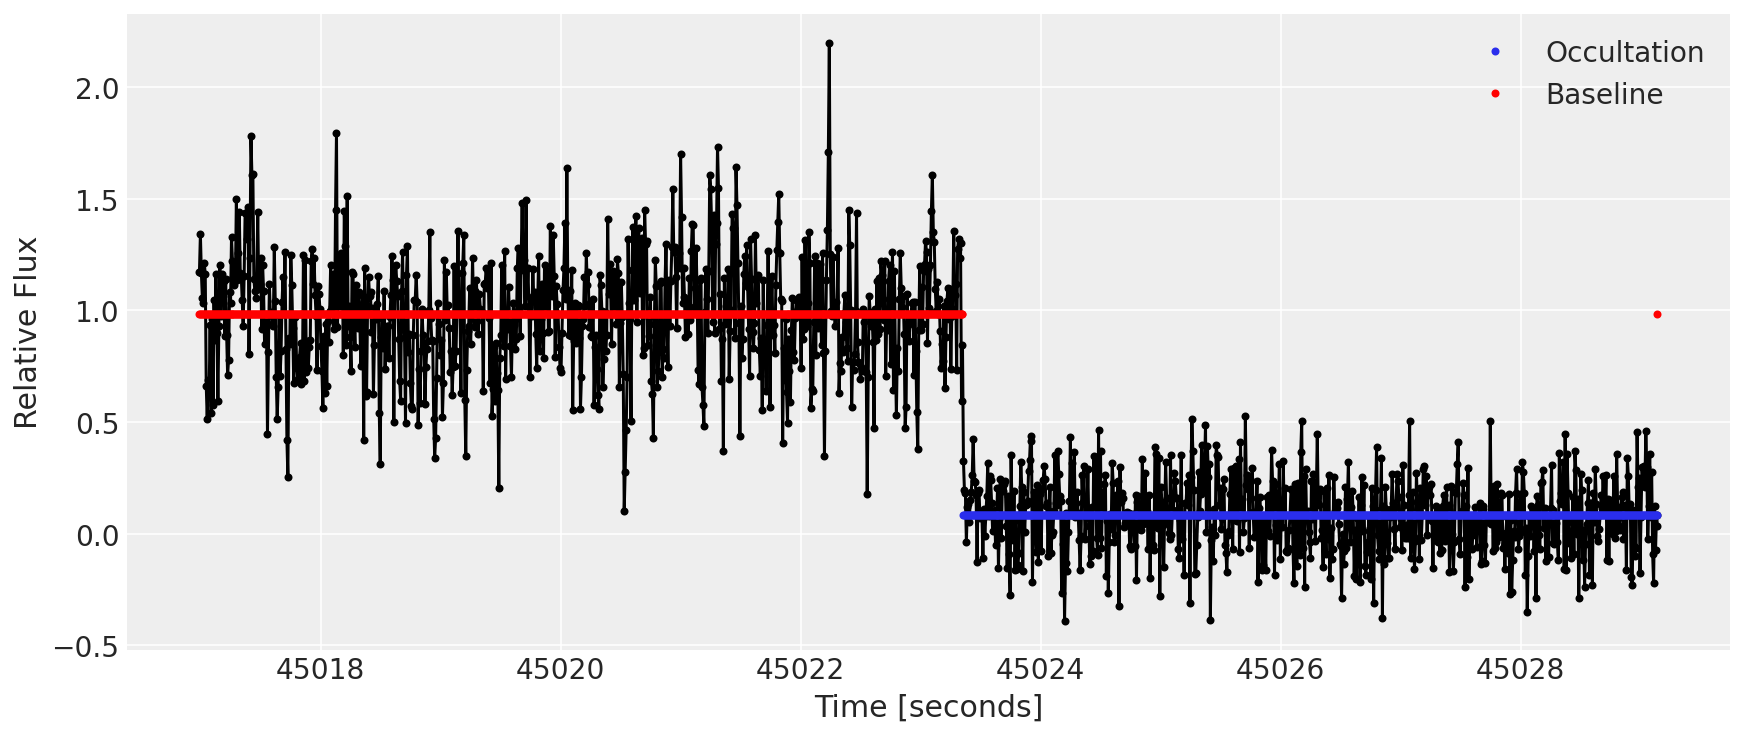

In [34]:
plt.figure(figsize=(12,5))
tes2 = lc.occ_detect(plot=True)

tes2

**Parameter untuk model**

In [44]:
immersion_time = 45023.35  # seconds relative to tref
emersion_time  = 45040  # seconds relative to tref
opacity = 1.0            # 1.0 == opaque; 0.0 == transparent

tmin = immersion_time  - 5 # seconds relative to tref
tmax = emersion_time   + 5 # seconds relative to tref

mask = (lc.time > tmin) & (lc.time < tmax)

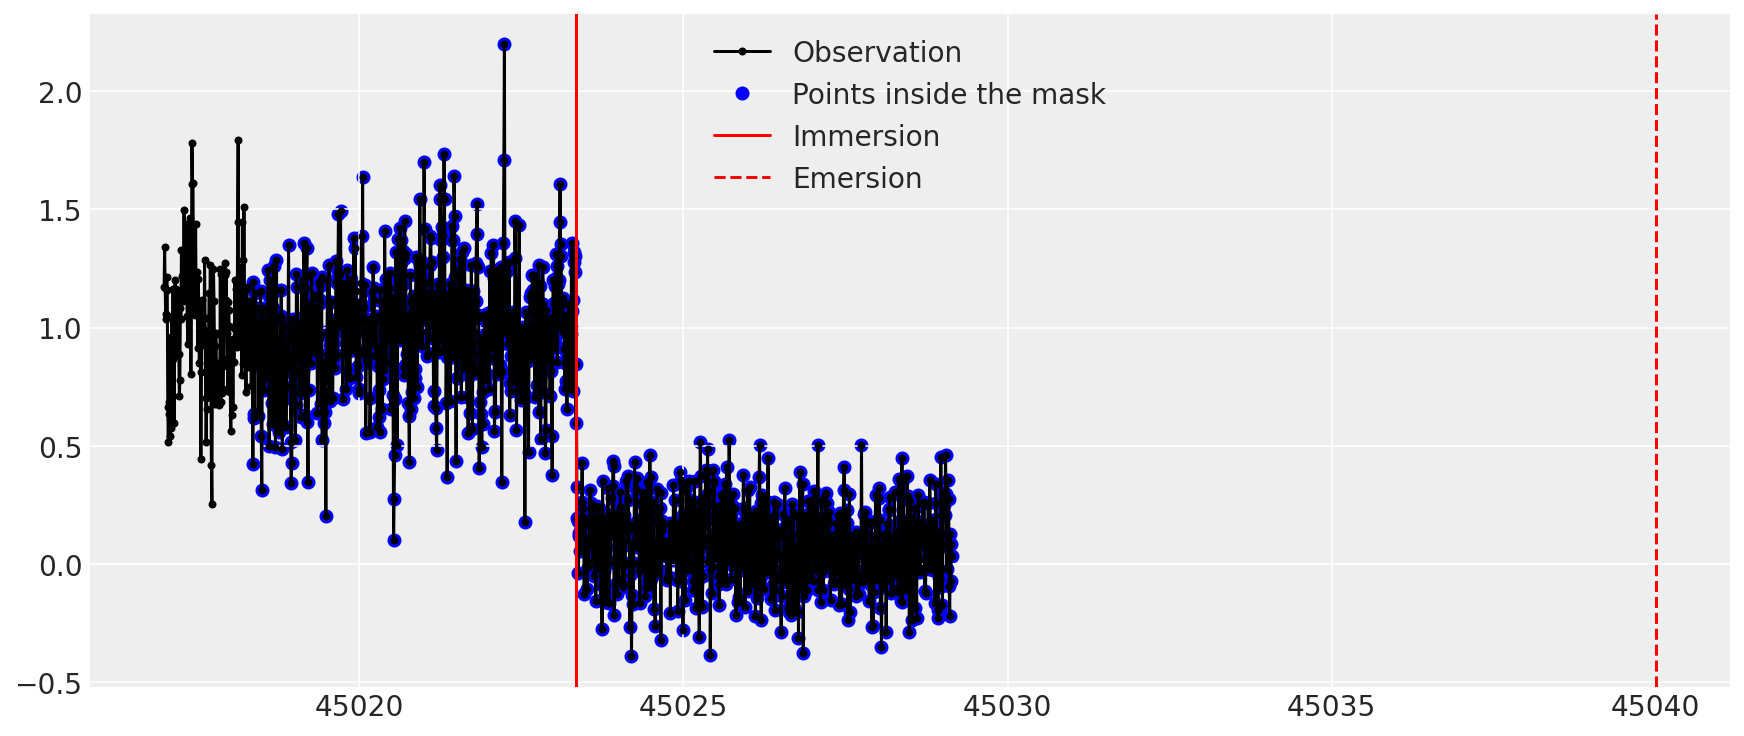

In [45]:
plt.figure(figsize=(12,5))
plt.plot(lc.time,lc.flux,'k.-',zorder=1,label='Observation')
plt.plot(lc.time[mask],lc.flux[mask],'bo',zorder=0,label='Points inside the mask')
plt.axvline(immersion_time,color='r',linestyle='-',label='Immersion')
plt.axvline(emersion_time,color='r',linestyle='--',label='Emersion')
plt.legend()

In [46]:
lc_chi2 = lc.occ_lcfit(loop=1000)

LightCurve fit: |████████████████████████████████████████|  - 100% 


In [47]:
print(lc_chi2)

Minimum chi-square: 1079.317
Number of fitted points: 1501
Number of fitted parameters: 2
Minimum chi-square per degree of freedom: 0.720

immersion:
    1-sigma: 45023.349 +/- 0.003
    3-sigma: 45023.354 +/- 0.014

emersion:
    1-sigma: 45029.148 +/- 0.004
    3-sigma: 45029.143 +/- 0.010



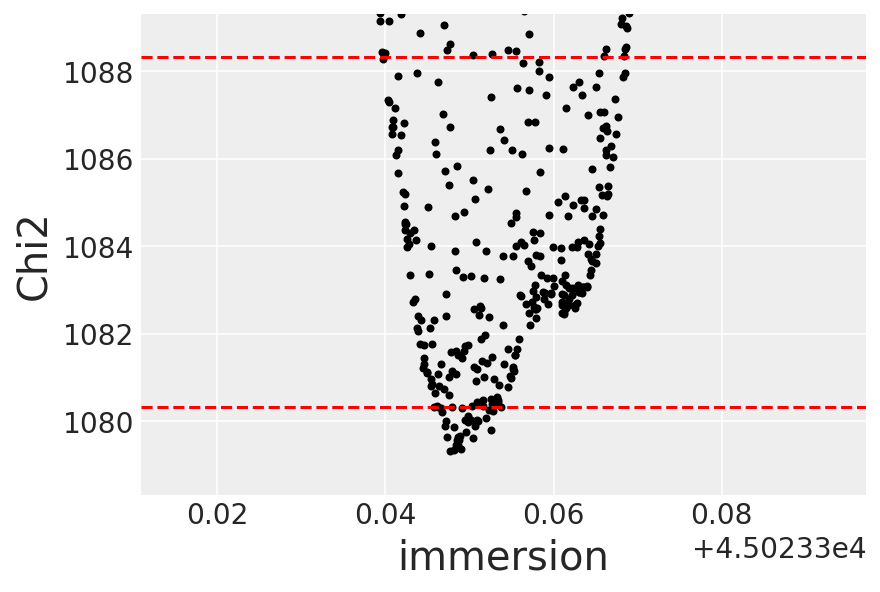

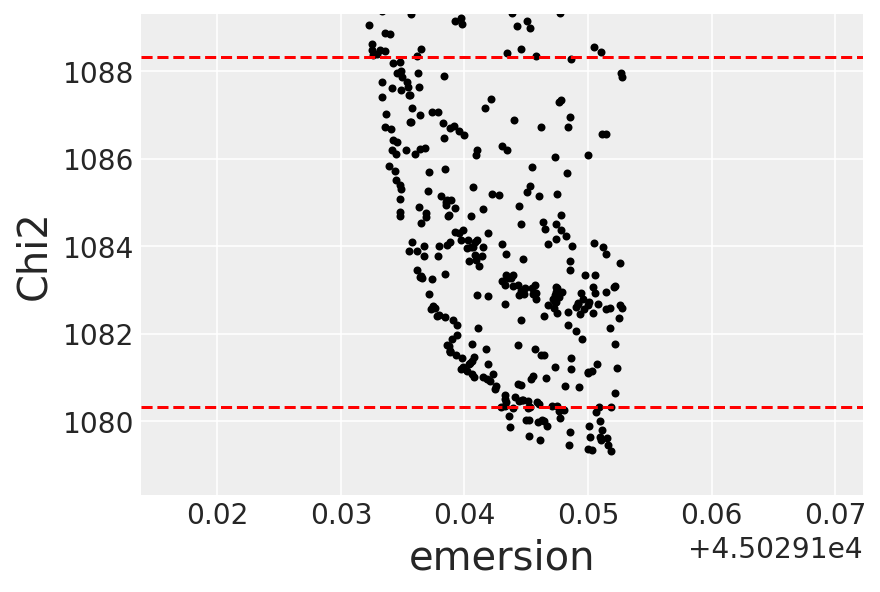

In [48]:
lc_chi2.plot_chi2()

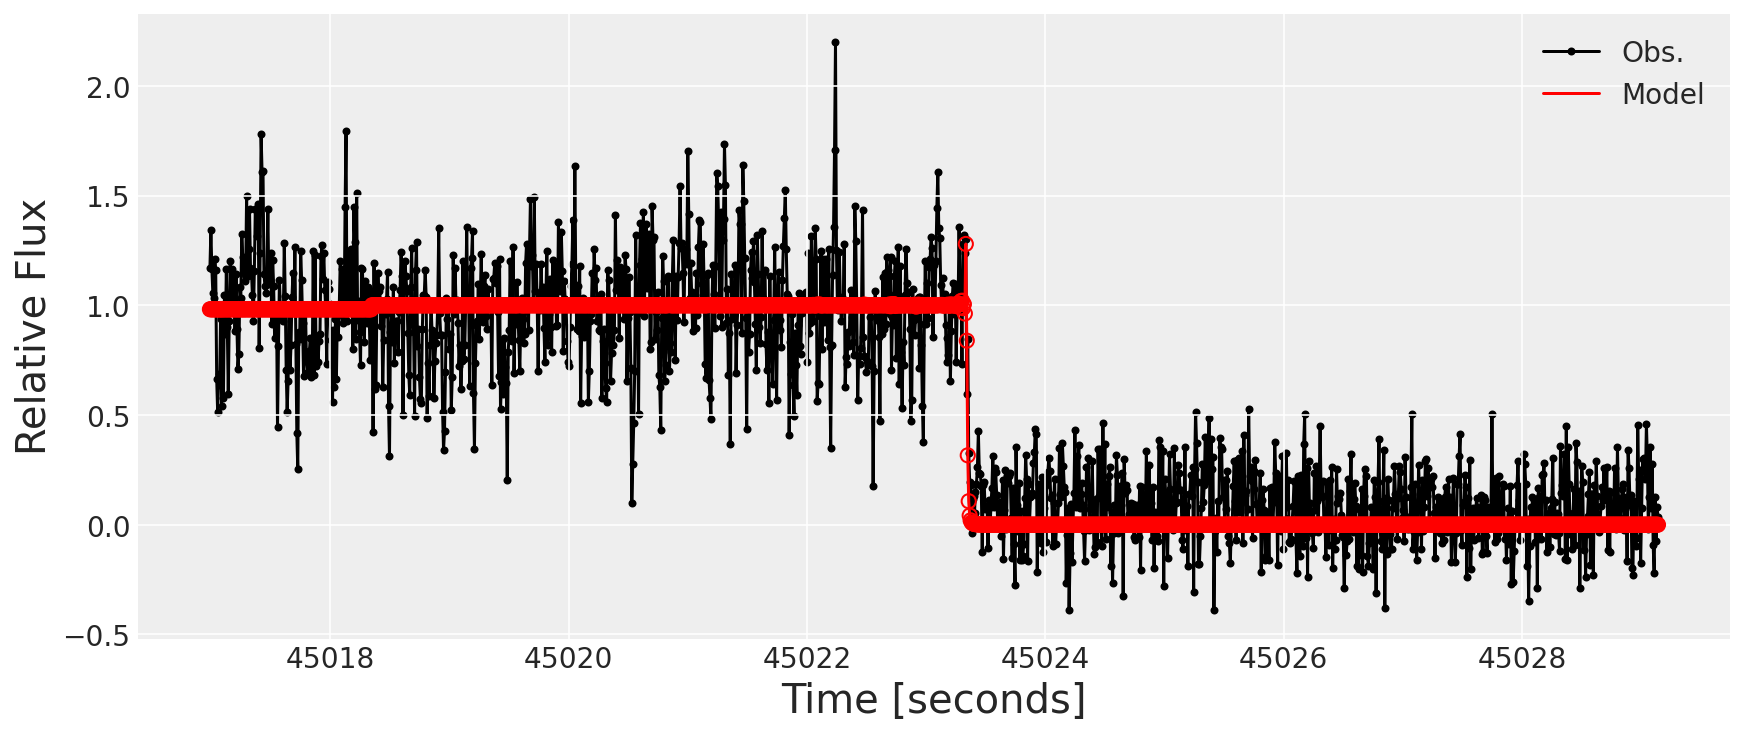

In [49]:
plt.figure(figsize=(12,5))
lc.occ_model(immersion_time, emersion_time, opacity, mask)

lc.plot_lc()
# plt.xlim(50680,50682)
# plt.ylim(-0.5,3)

Karena pada pengamatan ini tidak mengalami *emmersion*, maka plot *immersion* saja.

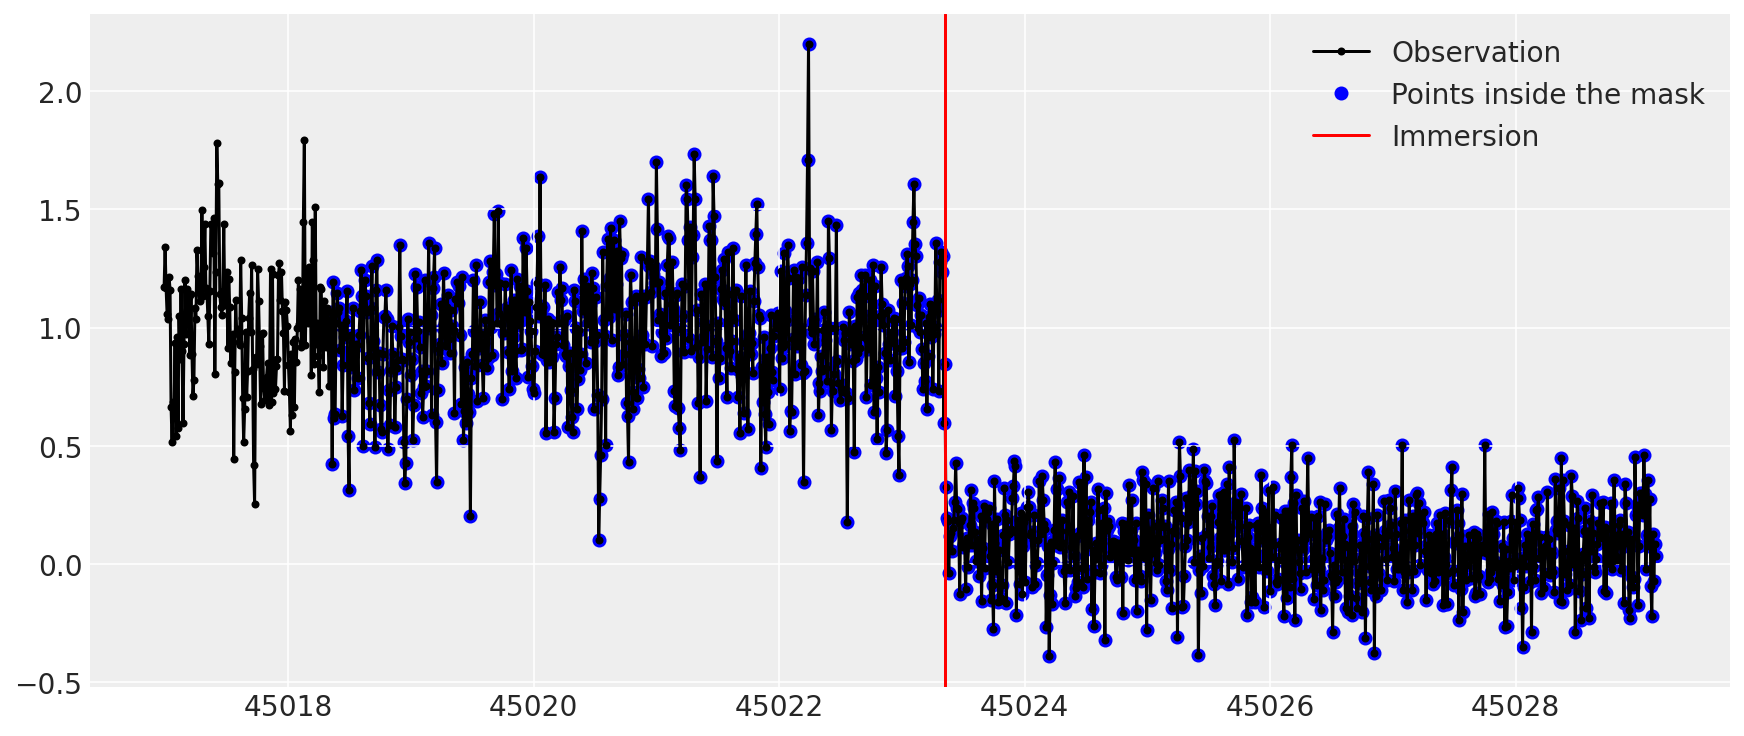

In [50]:
plt.figure(figsize=(12,5))
plt.plot(lc.time,lc.flux,'k.-',zorder=1,label='Observation')
plt.plot(lc.time[mask],lc.flux[mask],'bo',zorder=0,label='Points inside the mask')
plt.axvline(immersion_time, color='r',linestyle='-',label='Immersion')
plt.legend()

In [51]:
lc_chi2_imm = lc.occ_lcfit(tmin=tmin, tmax=tmax, immersion_time=immersion_time, loop=1000)

LightCurve fit: |████████████████████████████████████████|  - 100% 


In [52]:
print(lc_chi2_imm)

Minimum chi-square: 912.165
Number of fitted points: 1333
Number of fitted parameters: 1
Minimum chi-square per degree of freedom: 0.685

immersion:
    1-sigma: 45023.350 +/- 0.004
    3-sigma: 45023.353 +/- 0.013



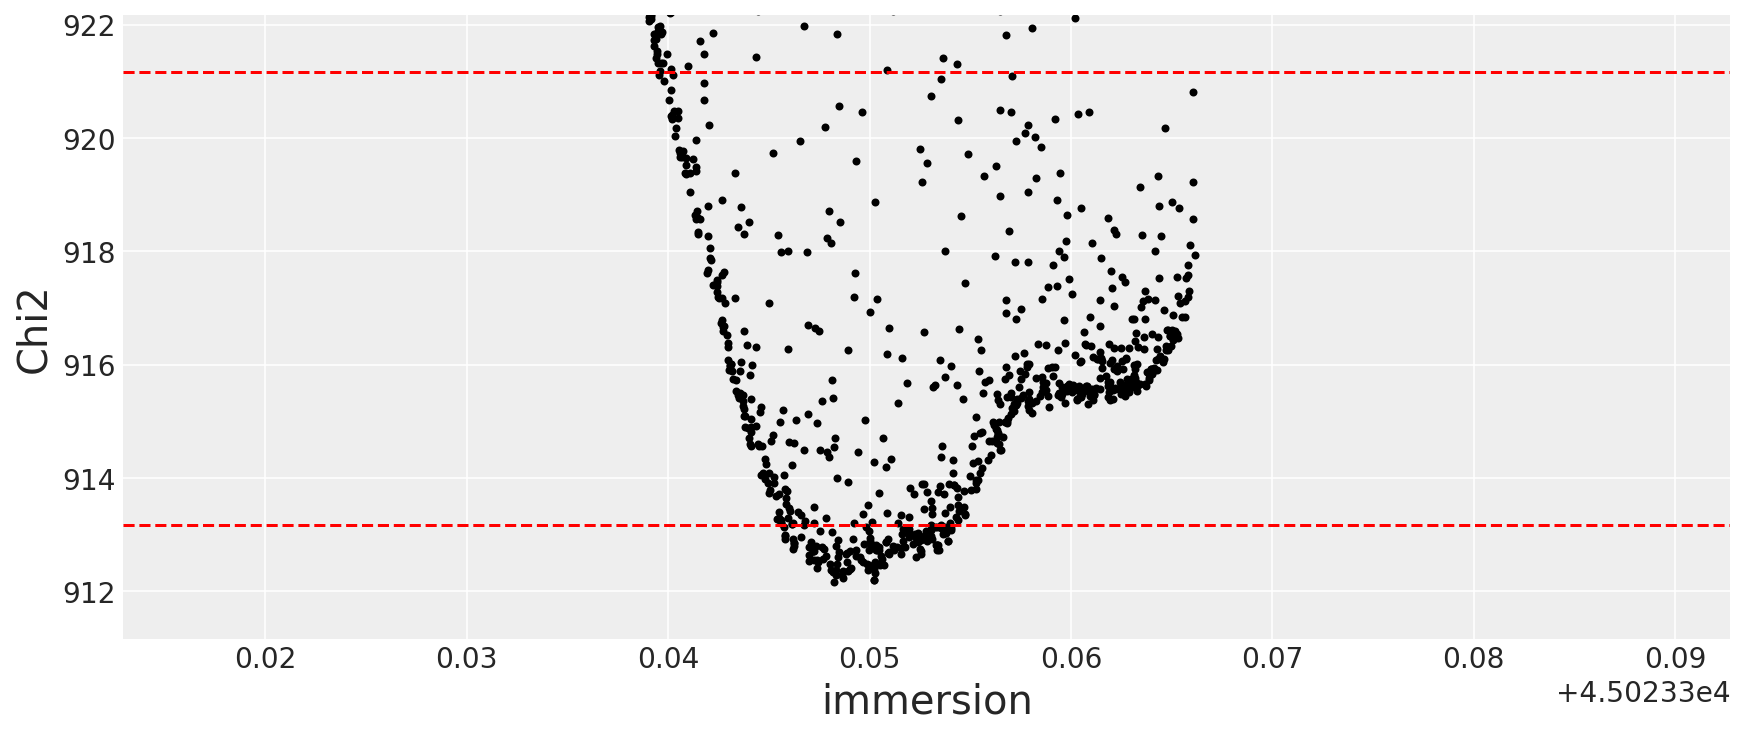

In [53]:
plt.figure(figsize=(12,5))
lc_chi2_imm.plot_chi2()

In [54]:
print(lc)

Light curve name: SAO 159213
Initial time: 2022-09-06 12:30:16.990 UTC
End time:     2022-09-06 12:30:29.141 UTC
Duration:     0.203 minutes
Time offset:  0.000 seconds

Exposure time:    0.0080 seconds
Cycle time:       0.0081 seconds
Num. data points: 1501

Bandpass:             0.550 +/- 0.200 microns
Object Distance:      0.00 AU
Used shadow velocity: 0.699 km/s
Fresnel scale:        0.015 seconds or 0.01 km
Stellar size effect:  0.002 seconds or 0.00 km
Inst. response:       0.008 seconds or 0.01 km
Dead time effect:     0.000 seconds or 0.00 km
Model resolution:     0.001 seconds or 0.00 km
Modelled baseflux:    0.982
Modelled bottomflux:  0.101
Light curve sigma:    0.257

Immersion time: 2022-09-06 12:30:23.350 UTC +/- 0.004 seconds
Emersion time:  2022-09-06 12:30:29.148 UTC +/- 0.004 seconds

Monte Carlo chi square fit.

Minimum chi-square: 912.165
Number of fitted points: 1333
Number of fitted parameters: 1
Minimum chi-square per degree of freedom: 0.685

immersion:
    1-si

(45023.0, 45023.7)

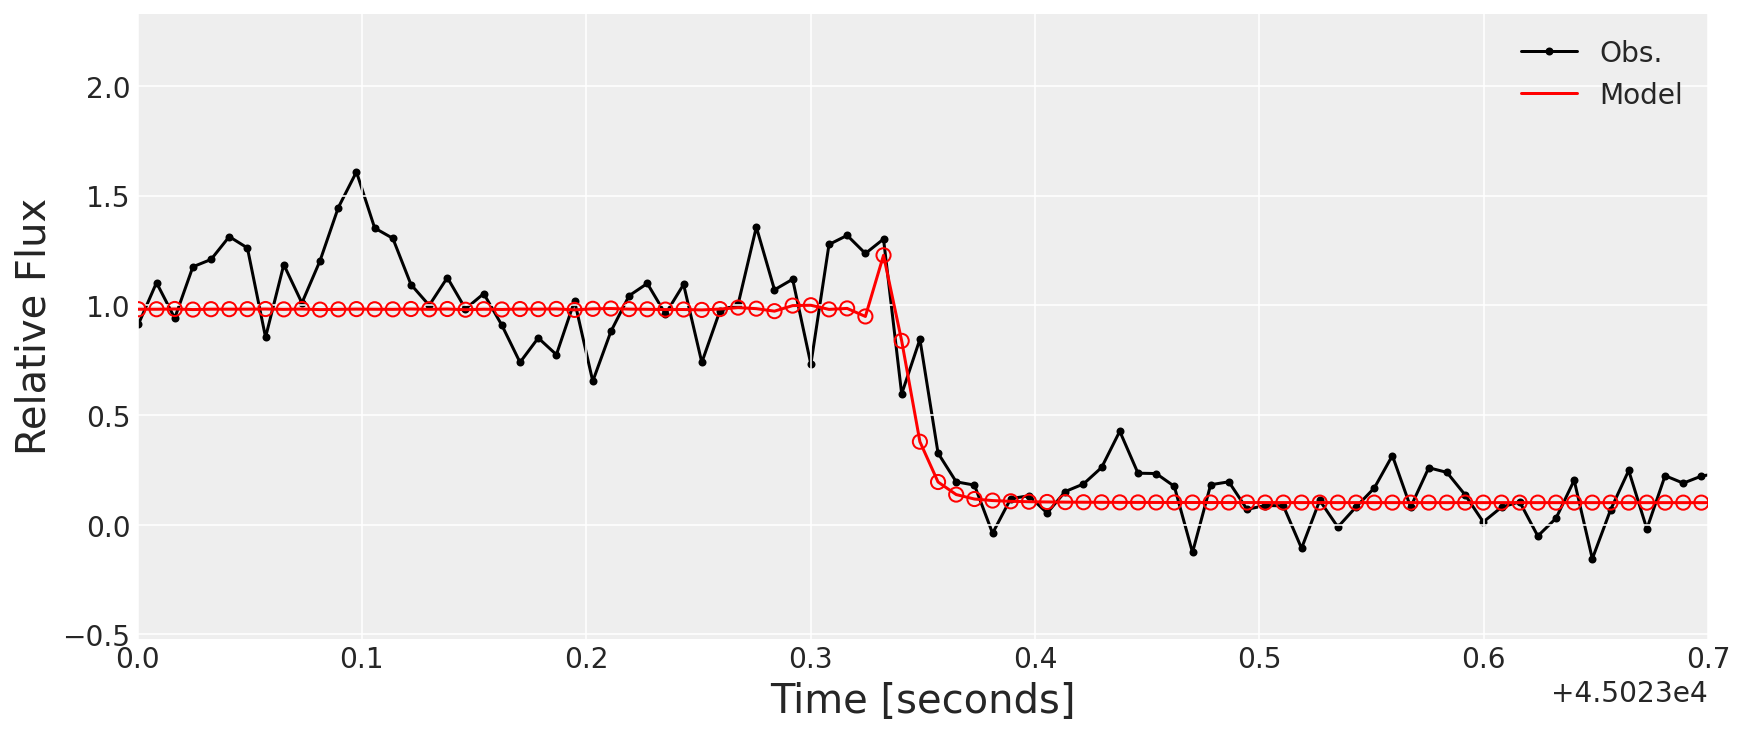

In [60]:
plt.figure(figsize=(12,5))
lc.plot_lc()
plt.xlim(45023, 45023.7)

(45023.0, 45023.7)

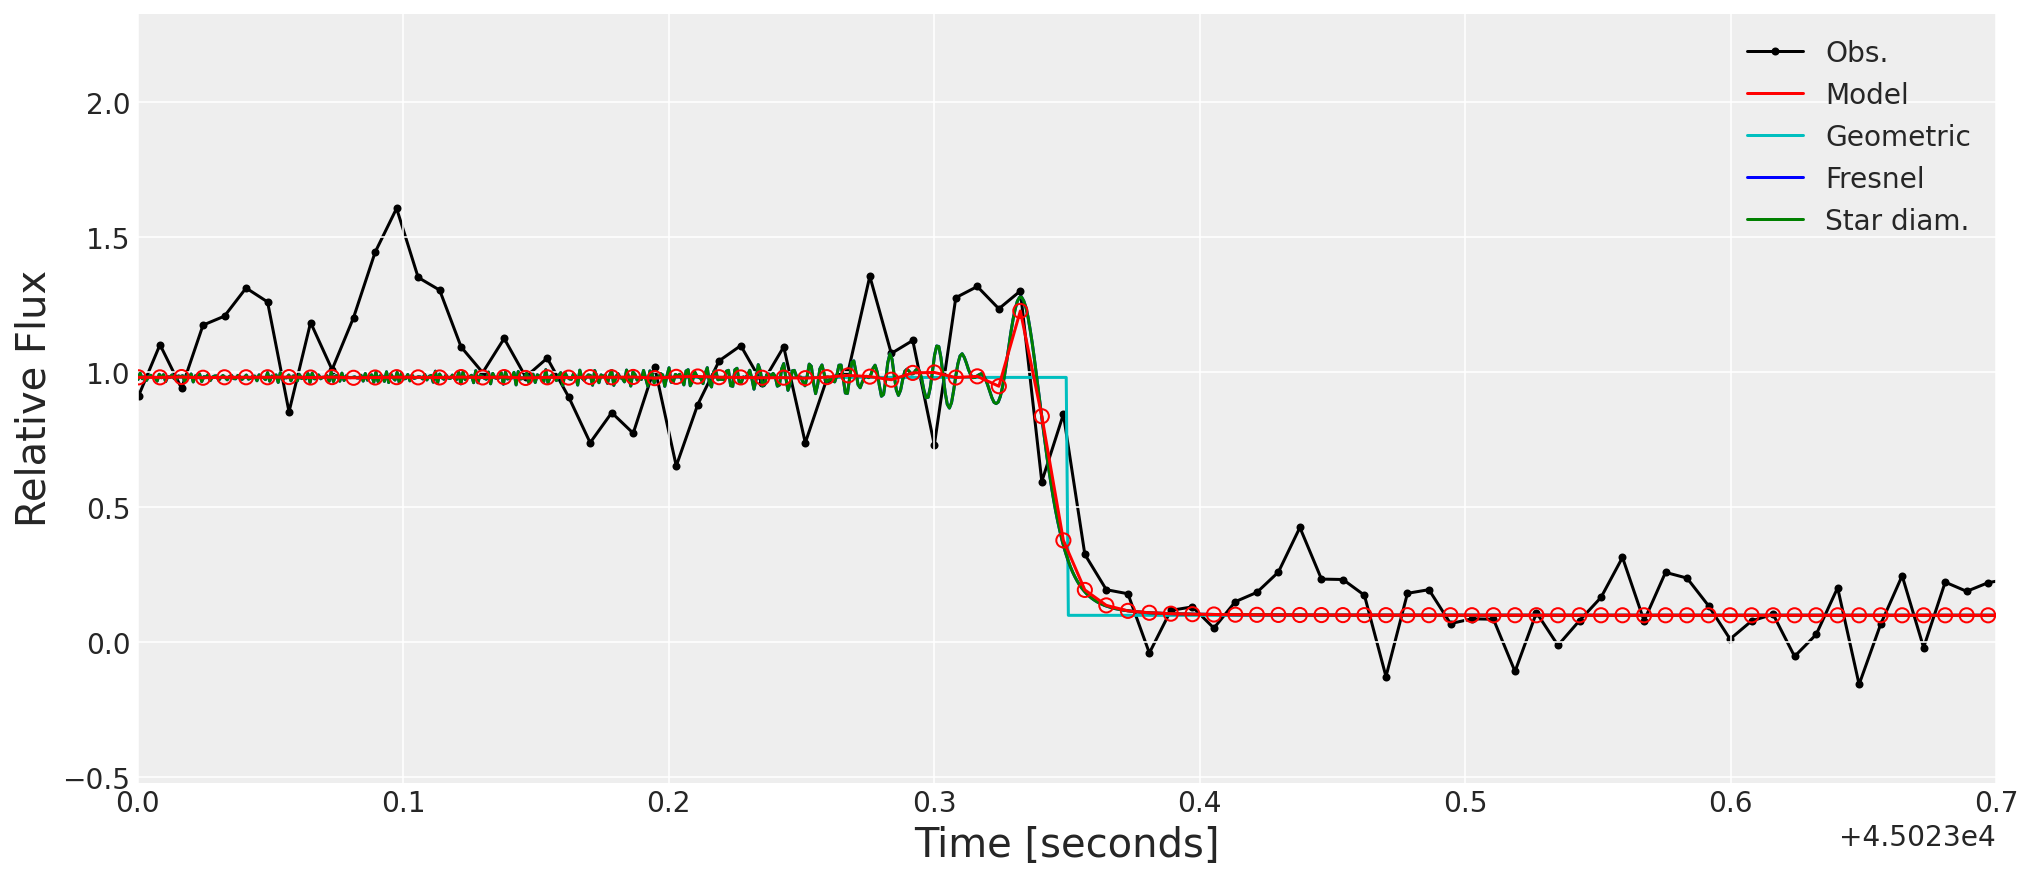

In [61]:
plt.figure(figsize=(14,6))
lc.plot_lc()
lc.plot_model()

plt.xlim(45023, 45023.7)
# plt.ylim(-0.25, 1.5)

In [62]:
lc.immersion

<Time object: scale='utc' format='iso' value=2022-09-06 12:30:23.350>